# Heart Failure Prediction
#### Using Kaggle data to create a model for predicting mortality caused by Heart Failure.
Creating a neural network (ANN) and comparing it to baseline models (SVM, kNN, LogisticRegression)

Performance metrics: accuracy, precision, recall, F1-score, ROC curve, AUC

In [4]:
# import modules
## standard modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

## pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## modelling
### baseline
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

### artificial neural network (ANN)
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential

## cross-validation
from sklearn.model_selection import KFold

## performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve 

## Importing data and preprocessing

Data split and scaling

In [86]:
# import data
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
described = df.describe().drop(axis=0, index=["std","25%","50%","75%"])
described

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.41806,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.26087,0.32107
min,40.000000,0.000000,23.000000,0.00000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.00000,0.00000
max,95.000000,1.000000,7861.000000,1.00000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.00000,1.00000


We can note the dataset has 12 features contributing to the DEATH_EVENT. No columns are dropped.

In [68]:
# pre-processing
X = df.iloc[:,:-1].values
y = df.DEATH_EVENT.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [70]:
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
threshold = y_train.mean()
threshold

0.3179916317991632

## Neural Network

In [96]:
# initialise
ann = Sequential()

# input layer
ann.add(Dense(units=16, kernel_initializer="uniform", activation="relu", input_dim=12))

# hidden layers w/ regularisation
ann.add(Dense(units=8, kernel_initializer="uniform", activation="relu"))
ann.add(Dropout(0.25))
ann.add(Dense(units=8, kernel_initializer="uniform", activation="relu"))
ann.add(Dropout(0.5))

# output layer
ann.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid")) # units = 1 because this is binary classification (0 or 1)


In [72]:
# compile the network
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [73]:
# train the ANN
history = ann.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.25)

Epoch 1/100
6/6 [==============================] - 1s 40ms/step - loss: 0.6928 - accuracy: 0.6257 - val_loss: 0.6919 - val_accuracy: 0.7000
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6916 - accuracy: 0.6760 - val_loss: 0.6908 - val_accuracy: 0.7000
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6907 - accuracy: 0.6760 - val_loss: 0.6896 - val_accuracy: 0.7000
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.6896 - accuracy: 0.6760 - val_loss: 0.6885 - val_accuracy: 0.7000
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 0.6886 - accuracy: 0.6760 - val_loss: 0.6872 - val_accuracy: 0.7000
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.6875 - accuracy: 0.6760 - val_loss: 0.6858 - val_accuracy: 0.7000
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6862 - accuracy: 0.6760 - val_loss: 0.6844 - val_accuracy: 0.7000
Epoch 8/100
6/6 [=======

In [74]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('validation_accuracy is', val_accuracy*100))


validation_accuracy is: 76.42%


In [75]:
# save model
ann.save("ann_model")

INFO:tensorflow:Assets written to: ann_model\assets


INFO:tensorflow:Assets written to: ann_model\assets


In [94]:
# predictions
ann_pred = ann.predict(X_test)
ann_pred = np.where(ann_pred>threshold, 1, 0)
ann_pred.max()

2/2 [==============================] - 0s 4ms/step


1

<Axes: >

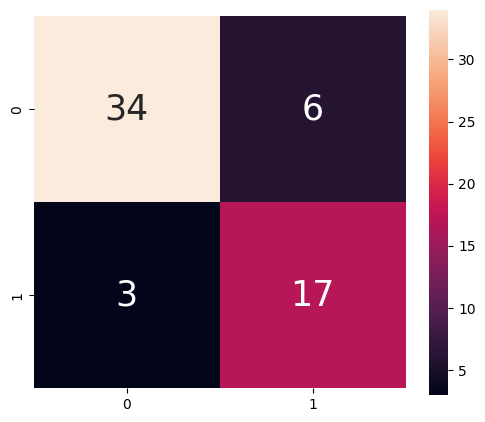

In [107]:
# Getting the confusion matrix
plt.subplots(figsize=(6,5))
cf_matrix = confusion_matrix(y_test, ann_pred)
sns.heatmap(cf_matrix, annot = True, annot_kws = {'size':25}, square=True)